# Inspect JSON Dataset

In [6]:
import pandas as pd
import gensim
import jieba
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

# Load Dataset and Inpect Few Rows

In [7]:
filename_dataset = '../crawler/employment_website_104/dataset/jobs_104.json'

dataset_df = pd.read_json(filename_dataset)

In [8]:
len(dataset_df)

996

In [9]:
dataset_df.head()

,address,benefit,company,experience,requirement,requirement_others,salary,title
0,台北市內湖...,福利健全 ■ 優渥的薪資、獎金 ◎ 端午節、中秋節、年終獎金。 ◎ 定期依工作績效調...,芯鼎科技股份有限公司,不拘,- Driver development and fine tune of customiz...,"- A BS degree in Computer Engineering, Electri...",待遇面議 ...,系統應用工程師-台北(CD2320) ...
1,台北市大安...,＊獎金福利＊1. 年節禮金2. 生日禮金3. 年終分紅4. 人才介紹獎金＊休假福利＊1. ...,銓鴻資訊有限公司,1年以上,1. 研究市場數據和交易數據，並進行交易策略研發。 2. 開發模型和工具，監控分析交易程序...,將先以電子履歷篩選增加效率，請注意以下事項： ■ 履歷請詳述相關經驗並請提供 Github/...,"年薪 1,000,000~2,500,000元 ...",計量交易員 Quantitative Tr...
2,新北市新店...,《薪酬福利＠HTC》我們極力落實利潤與員工分享的精神，透過多元的薪酬組合與完善的福利方案，...,宏達電 HTC Corporation_宏達國際電子股份有限公司,不拘,Join the creative thinkers at HTC Healthcare. ...,Requirement:-MS or PhD in computer science or ...,待遇面議 ...,(RD S/W) DeepQ - Comp...
3,桃園市中壢...,正職/全職人員之福利與訓練制度： 【薪酬福利】 -每年依市場薪資水準評估薪資調整專案 -...,OK超商_來來超商股份有限公司,不拘,OK超商認為，用心經營的企業，首重人才培訓。 因此，我們投入了大量的訓練資源，積極培育新一...,1.具服務熱忱，科系、經驗不拘，須輪班。 2.須自備交通工具及電腦網路設備(透過e-Lear...,"月薪 31,000~33,000元 ...",儲備幹部(大桃園地區) ...
4,新竹縣竹北...,【工作福利】彈性上下班。 【休假福利】週休二日、國定假日、婚假、產假、陪產假、特休假、彈...,神亞科技股份有限公司,3年以上,影像相關之深度學習演算法研究與開發,1. 有開發image processing相關應用經驗 2. 熟悉深度學習相關算法（e.g...,待遇面議 ...,AI 工程師 ...


In [10]:
dataset_df['requirement'][986]

'1.\t熟悉Linux系統, 具C/C++/Python程式語言設計經驗  2.\t熟悉Machine Learning以及Deep Learning framework, 具AI需求分析與應用開發經驗  3.\t具Machine Learning以及Deep Learning演算法開發與優化經驗者尤佳  4.\t有 Caffe, TensorFlow, Keras等 相關經驗為佳 5.\t熟悉語音訊號處理, 例如: 回聲消除/ 噪音抑制/ 麥克風陣列訊號處理等  6.\t熟悉語音演算法應用, 例如: 語音辨識/ 語者辨識/ 語音喚醒等  【共創A+聯詠】 穩健踏實、專家精神、創造優勢 驅動科技、開發創新、引領未來 邀請優秀人才，共創A+聯詠'

In [11]:
requirements = dataset_df['requirement'] + ' ' + dataset_df['requirement_others']

In [12]:
requirements[0:2]

0    - Driver development and fine tune of customiz...
1    1. 研究市場數據和交易數據，並進行交易策略研發。  2. 開發模型和工具，監控分析交易程序...
dtype: object

In [13]:
requirements[1]

'1. 研究市場數據和交易數據，並進行交易策略研發。  2. 開發模型和工具，監控分析交易程序運行情況研究，實施統計套利策略，並研發統計套利回測工具。  3. 熟悉python R 或者c++,有自主研發量化策略的能力。 4. 具備機率、統計、機器學習和金融市場研究經驗 。  求才若渴 如果你(妳)有下列特質：  是個懶人： 希望以最小的力氣達成目標，甚至提升品質，懂得善用工具增加生產力，重構提煉自有的程式庫。  有團隊精神： 懂得協同合作提升整體效益，將團隊目標置於個人之前。  充滿好奇心： 喜歡接觸、學習新事物，發現各種創新的可能。  熱愛程式： 充滿熱情想改變世界，將巧思及創造力注入每一行程式碼。   歡迎加入我們！ 一起邁向偉大航道 : ) 將先以電子履歷篩選增加效率，請注意以下事項： ■ 履歷請詳述相關經驗並請提供 Github/Sample Code/作品，加速審核 。 ■ 我們非常重視求職者的職務申請，履歷將由相關團隊主管嚴謹評估，因履歷眾多，意者我們將主動聯繫，請求職者悉知並耐心等候。'

# Strip Punctuations

In [14]:
gensim.parsing.preprocessing.strip_punctuation(requirements[1])

'1  研究市場數據和交易數據，並進行交易策略研發。  2  開發模型和工具，監控分析交易程序運行情況研究，實施統計套利策略，並研發統計套利回測工具。  3  熟悉python R 或者c 有自主研發量化策略的能力。 4  具備機率、統計、機器學習和金融市場研究經驗 。  求才若渴 如果你 妳 有下列特質：  是個懶人： 希望以最小的力氣達成目標，甚至提升品質，懂得善用工具增加生產力，重構提煉自有的程式庫。  有團隊精神： 懂得協同合作提升整體效益，將團隊目標置於個人之前。  充滿好奇心： 喜歡接觸、學習新事物，發現各種創新的可能。  熱愛程式： 充滿熱情想改變世界，將巧思及創造力注入每一行程式碼。   歡迎加入我們！ 一起邁向偉大航道     將先以電子履歷篩選增加效率，請注意以下事項： ■ 履歷請詳述相關經驗並請提供 Github Sample Code 作品，加速審核 。 ■ 我們非常重視求職者的職務申請，履歷將由相關團隊主管嚴謹評估，因履歷眾多，意者我們將主動聯繫，請求職者悉知並耐心等候。'


# Tokenize Chinese/English Sentences using Jieba package

In [15]:
doc = requirements[0]

tokens = [t for t in jieba.cut(doc, cut_all=False)]

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.007 seconds.
Prefix dict has been built succesfully.


In [16]:
tokens[:10]

['-', ' ', 'Driver', ' ', 'development', ' ', 'and', ' ', 'fine', ' ']

In [17]:
doc = requirements[1]

tokens = [t for t in jieba.cut(doc, cut_all=False)]

In [18]:
tokens[:10]

['1', '.', ' ', '研究', '市場', '數據', '和', '交易', '數據', '，']

#### Tokens '機器', '學習' should be a single token '機器學習'

In [19]:
tokens[70:80]

['具備', '機率', '、', '統計', '、', '機器', '學習', '和', '金融', '市場']

# Load Custom Dictionary
Reference: https://github.com/fxsjy/jieba

* Usage： jieba.load_userdict(file_name) # file_name is a file-like object or the path of the custom dictionary
* The dictionary format is the same as that of dict.txt: one word per line; each line is divided into three parts separated by a space: word, word frequency, POS tag. If file_name is a path or a file opened in binary mode, the dictionary must be UTF-8 encoded.
* The word frequency and POS tag can be omitted respectively. The word frequency will be filled with a suitable value if omitted.

For example:

创新办 3 i

云计算 5

凱特琳 nz

台中

In [20]:
filename_userdict = './custom_dictionary.txt'
jieba.load_userdict(filename_userdict)

In [21]:
doc = requirements[4]

tokens = [t for t in jieba.cut(doc, cut_all=False)]

In [22]:
tokens[:10]

['影像', '相關', '之', '深度學習', '演算法', '研究', '與', '開發', ' ', '1']

# Read Chinese Stopwords
Link to Chinese stopwords: https://github.com/goto456/stopwords

In [23]:
with open('./中文停用词表.txt') as f:
    lines = f.readlines()
    stopwords_chinese = [w.strip() for w in lines]
    
    
print(stopwords_chinese[:10])
print(stopwords_chinese[20:30])

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8']
['一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样', '一般', '一转眼']


# Preprocess Documents

In [24]:
def tokenizer(doc):
    return jieba.cut(doc, cut_all=False)


def preprocess_docs(raw_docs):
    """
    Args:
        raw_docs (list of string): list of documents
        
    Returns:
        list of list: list of tokens in a document
    """
    stopwords_custom = ['•', '與', '★', '●', '（', '’', '－', '✦', '◆', '◼', '✪', 
                        '※', '⁺', '', '', '·', '‧', '・', '）', '○', '】', '【', '✓', '']
    
    docs = []
    
    for d in tqdm(raw_docs):
        # Remove punctuations
#         d = gensim.parsing.preprocessing.strip_punctuation(d)
        
        # Normalize
        d = d.lower()
        
        tokens = []
        
        # Tokenize and Remove stopwords
        for t in tokenizer(d):
            
            t = gensim.parsing.preprocessing.strip_punctuation(t)
            t = gensim.parsing.preprocessing.strip_numeric(t)
            t = t.strip()
            if t is '':
                continue
                
            if t not in stopwords_chinese:
                if t not in gensim.parsing.preprocessing.STOPWORDS:
                    if t not in stopwords_custom:
                        tokens.append(t)
        
        docs.append(tokens)
        
    return docs


docs = preprocess_docs(requirements)

100%|██████████| 996/996 [00:06<00:00, 150.83it/s]


In [25]:
docs[0][:10]

['driver',
 'development',
 'fine',
 'tune',
 'customized',
 'hw',
 'accelerator',
 'opencv',
 'opencl',
 'openvx']

In [26]:
docs[1][:10]

['研究', '市場', '數據', '交易', '數據', '並進行', '交易', '策略', '研發', '開發']

# Create Gensim Dictionary

In [27]:
dictionary = gensim.corpora.Dictionary(docs)
print(len(dictionary))

10747


In [28]:
word_items = []
for index, wi in enumerate(dictionary.token2id.items()):
    if index < 150:
        word_items.append(wi)
        
print(word_items)

[('ability', 0), ('accelerator', 1), ('algorithm', 2), ('algorithms', 3), ('analysis', 4), ('architecture', 5), ('arm', 6), ('assembly', 7), ('attitude', 8), ('bs', 9), ('bsp', 10), ('c', 11), ('cnn', 12), ('collaboratively', 13), ('communication', 14), ('concepts', 15), ('cpu', 16), ('customer', 17), ('customers', 18), ('customized', 19), ('deadlines', 20), ('deep', 21), ('degree', 22), ('design', 23), ('development', 24), ('discuss', 25), ('driver', 26), ('e', 27), ('ecos', 28), ('electrical', 29), ('embedded', 30), ('engineering', 31), ('environment', 32), ('experience', 33), ('familiar', 34), ('fine', 35), ('frames', 36), ('framework', 37), ('freertos', 38), ('g', 39), ('good', 40), ('house', 41), ('hw', 42), ('icatchos', 43), ('image', 44), ('integration', 45), ('interactions', 46), ('involve', 47), ('issues', 48), ('knowledge', 49), ('language', 50), ('learning', 51), ('machine', 52), ('maintain', 53), ('meeting', 54), ('mips', 55), ('motivated', 56), ('nice', 57), ('opencl', 58)

# Filter Extreme Words
Remove very rare and very common words:

In [29]:
'''
- words appearing less than 5 times
- words appearing in more than 10% of all documents
'''
dictionary = gensim.corpora.Dictionary(docs)
dictionary.filter_extremes(no_below=6, no_above=0.1)
print(len(dictionary))

2445


In [30]:
word_items = []
for index, wi in enumerate(dictionary.token2id.items()):
    if index < 150:
        word_items.append(wi)
        
print(word_items)

[('algorithm', 0), ('architecture', 1), ('arm', 2), ('assembly', 3), ('attitude', 4), ('bs', 5), ('cnn', 6), ('concepts', 7), ('customer', 8), ('customers', 9), ('customized', 10), ('deadlines', 11), ('driver', 12), ('electrical', 13), ('embedded', 14), ('fine', 15), ('g', 16), ('house', 17), ('hw', 18), ('image', 19), ('integration', 20), ('involve', 21), ('issues', 22), ('language', 23), ('maintain', 24), ('meeting', 25), ('motivated', 26), ('nice', 27), ('opencl', 28), ('opencv', 29), ('pressure', 30), ('real', 31), ('requests', 32), ('rtos', 33), ('sdk', 34), ('self', 35), ('senior', 36), ('skilled', 37), ('solve', 38), ('tight', 39), ('time', 40), ('understanding', 41), ('–', 42), ('code', 43), ('github', 44), ('sample', 45), ('一起', 46), ('下列', 47), ('世界', 48), ('並進行', 49), ('事物', 50), ('事項', 51), ('交易', 52), ('以下', 53), ('作品', 54), ('充滿', 55), ('創新', 56), ('加速', 57), ('協同', 58), ('可能', 59), ('各種', 60), ('合作', 61), ('品質', 62), ('喜歡', 63), ('增加', 64), ('好奇心', 65), ('將', 66), ('履歷',

# Generate BOW (Bag Of Words)

In [31]:
bows = [dictionary.doc2bow(d) for d in docs]

In [32]:
print(len(bows[1]))
bows[1][10:20]

60


[(53, 1),
 (54, 1),
 (55, 2),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1)]

In [33]:
for id_word in range(50, 60):
    print(dictionary.get(id_word))

事物
事項
交易
以下
作品
充滿
創新
加速
協同
可能


# LDA using BOW
Hyper-parameters: https://markroxor.github.io/gensim/static/notebooks/lda_training_tips.html

In [34]:
num_topics = 10
passes = 20
iterations = 400

lda_model_bow = gensim.models.LdaModel(bows,
                                      num_topics=num_topics,
                                      id2word=dictionary,
                                      passes=passes,
                                      iterations=iterations,
                                      alpha='auto', eta='auto')

In [35]:
for index, topic in lda_model_bow.print_topics(-1):
    print('Topic {}: {}'.format(index, topic))

Topic 0: 0.046*"舖" + 0.039*"經營" + 0.026*"主任" + 0.023*"培訓" + 0.022*"培育" + 0.020*"分店" + 0.017*"表現" + 0.017*"區" + 0.016*"約" + 0.015*"客服"
Topic 1: 0.017*"image" + 0.014*"caffe" + 0.013*"network" + 0.011*"cnn" + 0.010*"object" + 0.009*"pytorch" + 0.008*"neural" + 0.008*"solution" + 0.008*"detection" + 0.008*"opencv"
Topic 2: 0.010*"cloud" + 0.008*"models" + 0.008*"build" + 0.006*"services" + 0.006*"aws" + 0.006*"information" + 0.006*"large" + 0.006*"like" + 0.006*"world" + 0.006*"understanding"
Topic 3: 0.021*"環境" + 0.017*"門市" + 0.015*"獎金" + 0.014*"完善" + 0.012*"制度" + 0.012*"教育" + 0.012*"福利" + 0.012*"想" + 0.012*"請" + 0.011*"年度"
Topic 4: 0.011*"algorithm" + 0.011*"audio" + 0.010*"signal" + 0.010*"hr" + 0.008*"able" + 0.008*"digital" + 0.007*"skill" + 0.006*"image" + 0.005*"soc" + 0.005*"driver"
Topic 5: 0.021*"training" + 0.012*"customer" + 0.009*"sales" + 0.009*"project" + 0.006*"programs" + 0.006*"manage" + 0.006*"customers" + 0.006*"ensure" + 0.006*"equipment" + 0.005*"needs"
Topic 6: 0.01

In [36]:
for index, topic in lda_model_bow.show_topics(-1, formatted=False):
    print('Topic {}: '.format(index))
    
    for word, weight in topic:
        print('\t\t{}'.format(word), end='\n')
#         print('{} '.format(word))


    print('\n')

Topic 0: 
		舖
		經營
		主任
		培訓
		培育
		分店
		表現
		區
		約
		客服


Topic 1: 
		image
		caffe
		network
		cnn
		object
		pytorch
		neural
		solution
		detection
		opencv


Topic 2: 
		cloud
		models
		build
		services
		aws
		information
		large
		like
		world
		understanding


Topic 3: 
		環境
		門市
		獎金
		完善
		制度
		教育
		福利
		想
		請
		年度


Topic 4: 
		algorithm
		audio
		signal
		hr
		able
		digital
		skill
		image
		soc
		driver


Topic 5: 
		training
		customer
		sales
		project
		programs
		manage
		customers
		ensure
		equipment
		needs


Topic 6: 
		數據
		統計
		客戶
		研究
		模型
		溝通
		專案
		產品
		進行
		深度學習


Topic 7: 
		成績
		請
		佳
		英文
		熟
		api
		研發
		檢附
		工程
		toeic


Topic 8: 
		test
		security
		testing
		web
		perform
		techniques
		issues
		end
		statistical
		improve


Topic 9: 
		軟體
		影像
		機械
		視覺
		機器
		控制
		工具
		協助
		d
		圖




In [37]:
init_values = [['']*num_topics]*10
bow_df = pd.DataFrame(init_values, columns=['topic{}'.format(i) for i in range(num_topics)])


for i_topic, topic in lda_model_bow.show_topics(-1, formatted=False):
#     print('Topic {}: '.format(index))
    
    for i_word, (word, weight) in enumerate(topic):
#         print('\t\t{}'.format(word), end='\n')
        bow_df.iloc[i_word][i_topic] = word

bow_df

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,舖,image,cloud,環境,algorithm,training,數據,成績,test,軟體
1,經營,caffe,models,門市,audio,customer,統計,請,security,影像
2,主任,network,build,獎金,signal,sales,客戶,佳,testing,機械
3,培訓,cnn,services,完善,hr,project,研究,英文,web,視覺
4,培育,object,aws,制度,able,programs,模型,熟,perform,機器
5,分店,pytorch,information,教育,digital,manage,溝通,api,techniques,控制
6,表現,neural,large,福利,skill,customers,專案,研發,issues,工具
7,區,solution,like,想,image,ensure,產品,檢附,end,協助
8,約,detection,world,請,soc,equipment,進行,工程,statistical,d
9,客服,opencv,understanding,年度,driver,needs,深度學習,toeic,improve,圖


# LDA using TF-IDF

In [38]:
def bow2tfidf(bows):
    tfidf = gensim.models.TfidfModel(bows)
    corpus_tfidf = tfidf[bows]
    
    return corpus_tfidf

corpus_tfidf = bow2tfidf(bows)

In [39]:
type(corpus_tfidf)

gensim.interfaces.TransformedCorpus

In [40]:
lda_model_tfidf = gensim.models.LdaModel(corpus_tfidf,
                                        num_topics=num_topics,
                                        id2word=dictionary,
                                        passes=passes,
                                        iterations=iterations,
                                        alpha='auto', eta='auto')

In [41]:
for index, topic in lda_model_tfidf.print_topics(-1):
    print('Index {}: topic= {}'.format(index, topic))

Index 0: topic= 0.005*"圖" + 0.004*"機械" + 0.003*"零件" + 0.003*"機" + 0.003*"image" + 0.003*"deepq" + 0.002*"械" + 0.002*"人員" + 0.002*"open" + 0.002*"機器"
Index 1: topic= 0.004*"training" + 0.003*"image" + 0.003*"project" + 0.003*"customer" + 0.003*"test" + 0.002*"cloud" + 0.002*"algorithm" + 0.002*"experiences" + 0.002*"models" + 0.002*"techniques"
Index 2: topic= 0.003*"caffe" + 0.003*"neural" + 0.002*"network" + 0.002*"說" + 0.002*"model" + 0.002*"d" + 0.002*"image" + 0.002*"佳" + 0.002*"keras" + 0.002*"algorithm"
Index 3: topic= 0.002*"佳" + 0.002*"image" + 0.002*"經驗者" + 0.002*"algorithm" + 0.002*"軟體" + 0.002*"navigation" + 0.002*"caffe" + 0.002*"windows" + 0.002*"slam" + 0.002*"庫"
Index 4: topic= 0.002*"image" + 0.002*"軟體" + 0.002*"algorithm" + 0.002*"caffe" + 0.002*"edge" + 0.002*"佳" + 0.002*"cloud" + 0.002*"experienced" + 0.002*"service" + 0.002*"network"
Index 5: topic= 0.006*"影像" + 0.005*"數據" + 0.005*"軟體" + 0.005*"深度學習" + 0.004*"研究" + 0.004*"統計" + 0.004*"模型" + 0.004*"佳" + 0.004*"產品" + 

In [42]:
for index, topic in lda_model_tfidf.show_topics(-1, formatted=False):
    print('Topic {}: '.format(index))
    
    for word, weight in topic:
        print('\t\t{}'.format(word), end='\n')
#         print('{} '.format(word))


    print('\n') 

Topic 0: 
		圖
		機械
		零件
		機
		image
		deepq
		械
		人員
		open
		機器


Topic 1: 
		training
		image
		project
		customer
		test
		cloud
		algorithm
		experiences
		models
		techniques


Topic 2: 
		caffe
		neural
		network
		說
		model
		d
		image
		佳
		keras
		algorithm


Topic 3: 
		佳
		image
		經驗者
		algorithm
		軟體
		navigation
		caffe
		windows
		slam
		庫


Topic 4: 
		image
		軟體
		algorithm
		caffe
		edge
		佳
		cloud
		experienced
		service
		network


Topic 5: 
		影像
		數據
		軟體
		深度學習
		研究
		統計
		模型
		佳
		產品
		經驗者


Topic 6: 
		speech
		recognition
		image
		軟體
		algorithm
		language
		pattern
		撰寫
		opencv
		caffe


Topic 7: 
		舖
		經營
		主任
		培育
		分店
		培訓
		區
		表現
		約
		顧


Topic 8: 
		neural
		algorithm
		customers
		attitude
		客戶
		network
		面試
		digital
		tw
		caffe


Topic 9: 
		experienced
		caffe
		image
		model
		algorithm
		cnn
		pytorch
		reinforcement
		network
		based




In [43]:
init_values = [['']*num_topics]*10
tfidf_df = pd.DataFrame(init_values, columns=['topic{}'.format(i) for i in range(num_topics)])


for i_topic, topic in lda_model_tfidf.show_topics(-1, formatted=False):
#     print('Topic {}: '.format(index))
    
    for i_word, (word, weight) in enumerate(topic):
#         print('\t\t{}'.format(word), end='\n')
        tfidf_df.iloc[i_word][i_topic] = word

tfidf_df

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,圖,training,caffe,佳,image,影像,speech,舖,neural,experienced
1,機械,image,neural,image,軟體,數據,recognition,經營,algorithm,caffe
2,零件,project,network,經驗者,algorithm,軟體,image,主任,customers,image
3,機,customer,說,algorithm,caffe,深度學習,軟體,培育,attitude,model
4,image,test,model,軟體,edge,研究,algorithm,分店,客戶,algorithm
5,deepq,cloud,d,navigation,佳,統計,language,培訓,network,cnn
6,械,algorithm,image,caffe,cloud,模型,pattern,區,面試,pytorch
7,人員,experiences,佳,windows,experienced,佳,撰寫,表現,digital,reinforcement
8,open,models,keras,slam,service,產品,opencv,約,tw,network
9,機器,techniques,algorithm,庫,network,經驗者,caffe,顧,caffe,based


Topic 0: 圖 機械 零件 機 image deepq 械 人員 open 機器
Topic 1: training image project customer test cloud algorithm experiences models techniques
Topic 2: caffe neural network 說 model d image 佳 keras algorithm
Topic 3: 佳 image 經驗者 algorithm 軟體 navigation caffe windows slam 庫
Topic 4: image 軟體 algorithm caffe edge 佳 cloud experienced service network
Topic 5: 影像 數據 軟體 深度學習 研究 統計 模型 佳 產品 經驗者
Topic 6: speech recognition image 軟體 algorithm language pattern 撰寫 opencv caffe
Topic 7: 舖 經營 主任 培育 分店 培訓 區 表現 約 顧
Topic 8: neural algorithm customers attitude 客戶 network 面試 digital tw caffe
Topic 9: experienced caffe image model algorithm cnn pytorch reinforcement network based


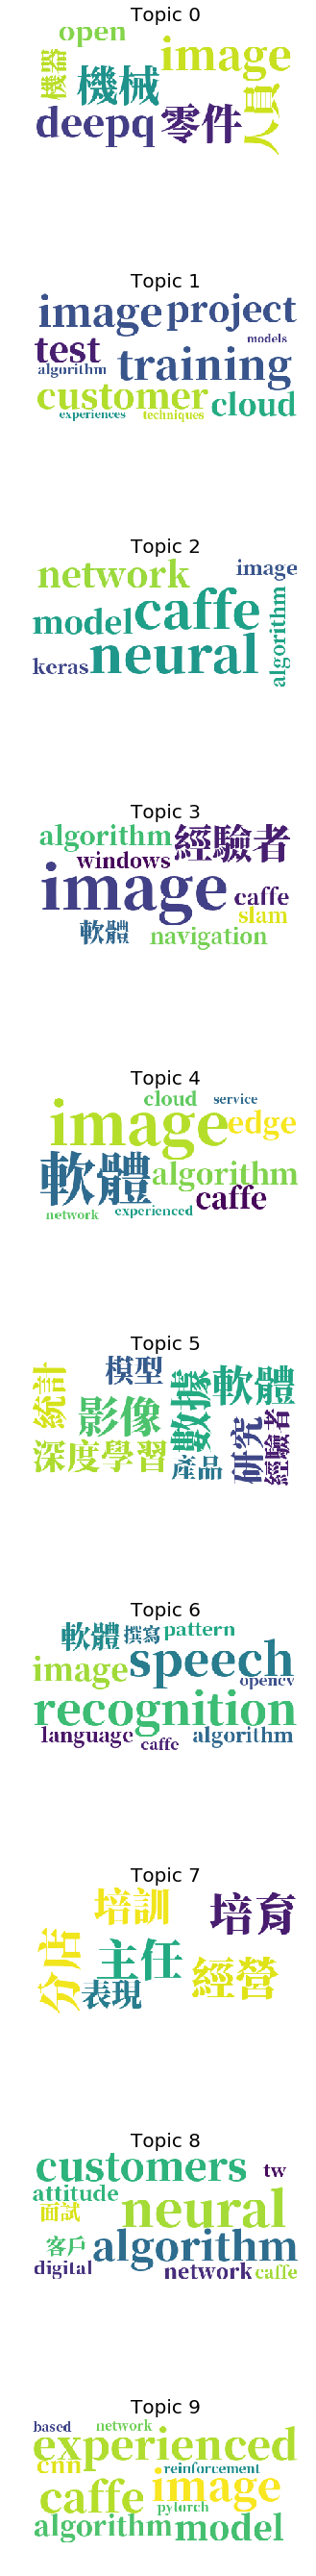

In [46]:
path_font = './NotoSerifCJKtc-Black.otf'

fig, axs = plt.subplots(num_topics)
fig.set_figheight(5*num_topics)
fig.set_figwidth(5)

for i_topic in range(num_topics):
    text = ' '.join(w for w in tfidf_df.iloc[:, i_topic])
    print('Topic {}: {}'.format(i_topic, text))
    wordCloud = WordCloud(background_color='white', font_path=path_font).generate(text)
    
    axs[i_topic].imshow(wordCloud)
    axs[i_topic].axis('off')
    axs[i_topic].set_title('Topic {}'.format(i_topic), size=20)